# Exploratory Data Analysis

## Importing packages

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them.

In [49]:
from google.colab import drive
drive.mount('/content/drive')

file_path_client = '/content/drive/MyDrive/Python /client_data (1).csv'
file_path_price = '/content/drive/MyDrive/Python /price_data (1).csv'

client_df = pd.read_csv(file_path_client)
price_df = pd.read_csv(file_path_price)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


We observe a mix of numerical data and categorical data that we will need to transform.

In [51]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


A lot of zero's, we will check to decide how to handle these

---

## Descriptive statistics of data


To first understand the data that we're dealing with along with the data types of each column. The data types may dictate how we transform and engineer features.



In [52]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [53]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


we see that the date columns are not in datetime format

In [54]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


we see highly skewed data with presence of outliers, evidenced by the difference in the mean dispersion around the mean, concentration of values around the tail and the max value relative to the 3rd quartile, i.e 75%

In [55]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


the price data seems mostly good

---

## Data visualization

Using `matplotlib` and `seaborn`, two of the most popular packages for visualization.

Below are some functions for visualizations. Parameters like title_, size_, rot_, and legend_ make it easy to customize the plot for different needs without modifying the code within the function.

Using stacked bar plot to compare churned and retention customers for categorical data and the histogram plot for distribution of numeric columns.

In [56]:
def plot_stacked_bars(dataframe, title_, size_=(18, 6), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation to place the text within the bar columns
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retention company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

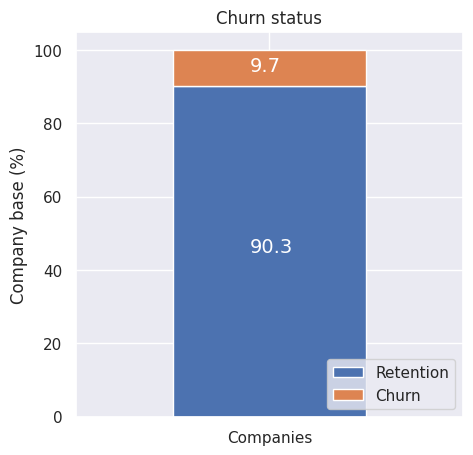

In [95]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), title_="Churn status", size_=(5, 5), legend_="lower right")

Current total churn percentage is 9.7%. The closer the churn rate is to 0.0%, the better

##Sales channel

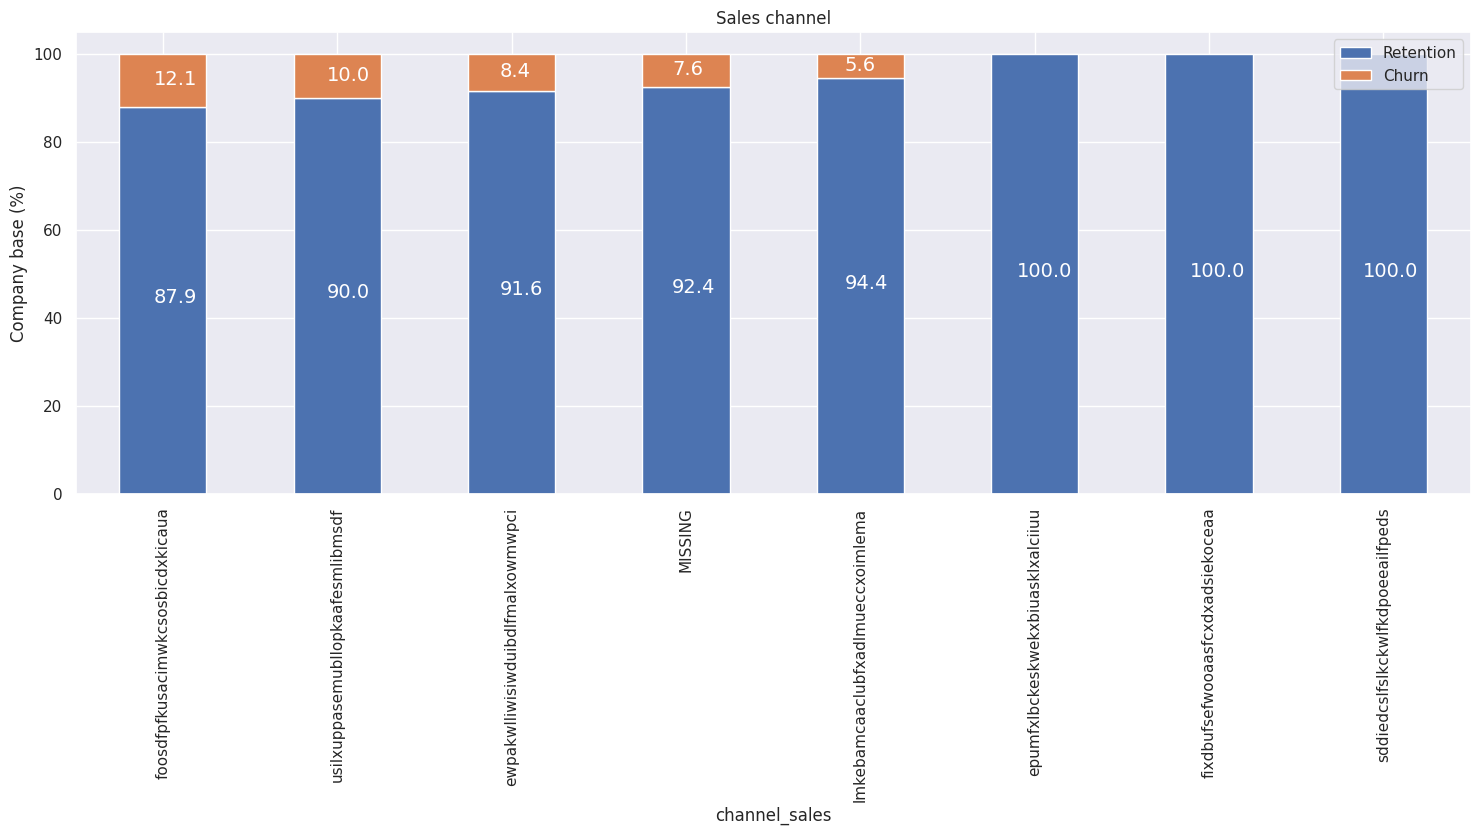

In [58]:
channel = client_df[['id', 'churn', 'channel_sales']]
channel = channel.groupby(['channel_sales', 'churn'])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, 'Sales channel', rot_=90)

This is interesting, we see that there are 5 specific sales channels that are related to the churn, one is labelled as missing, these are all unknown sales channels.

##Consumption

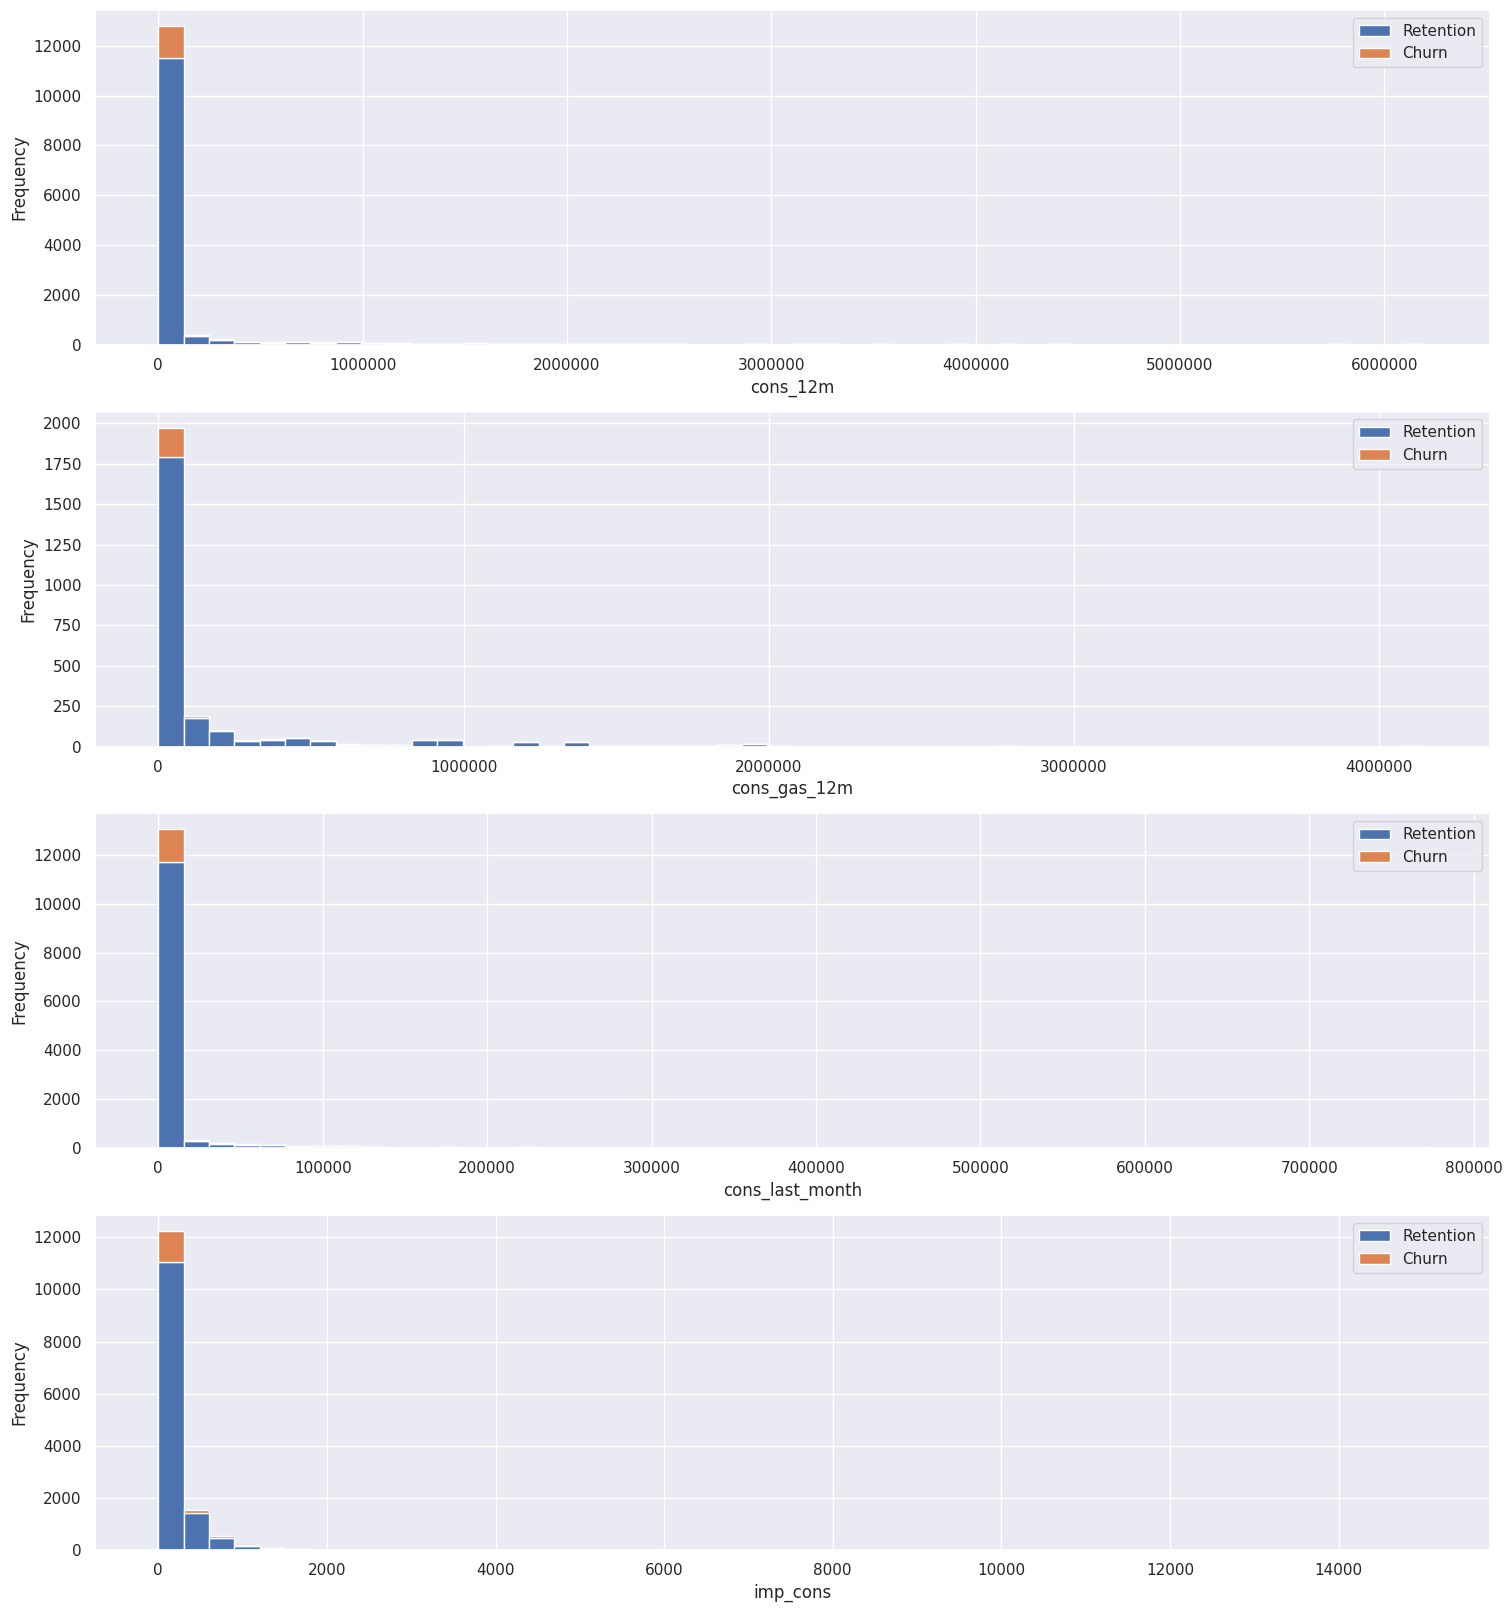

In [59]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 20))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

We see that the distribution of consumption values is highly skewed, it is likely that there are outliers in the dataset and the lower values are overly represented. We can look at boxplot to depict the distribution in more detail.

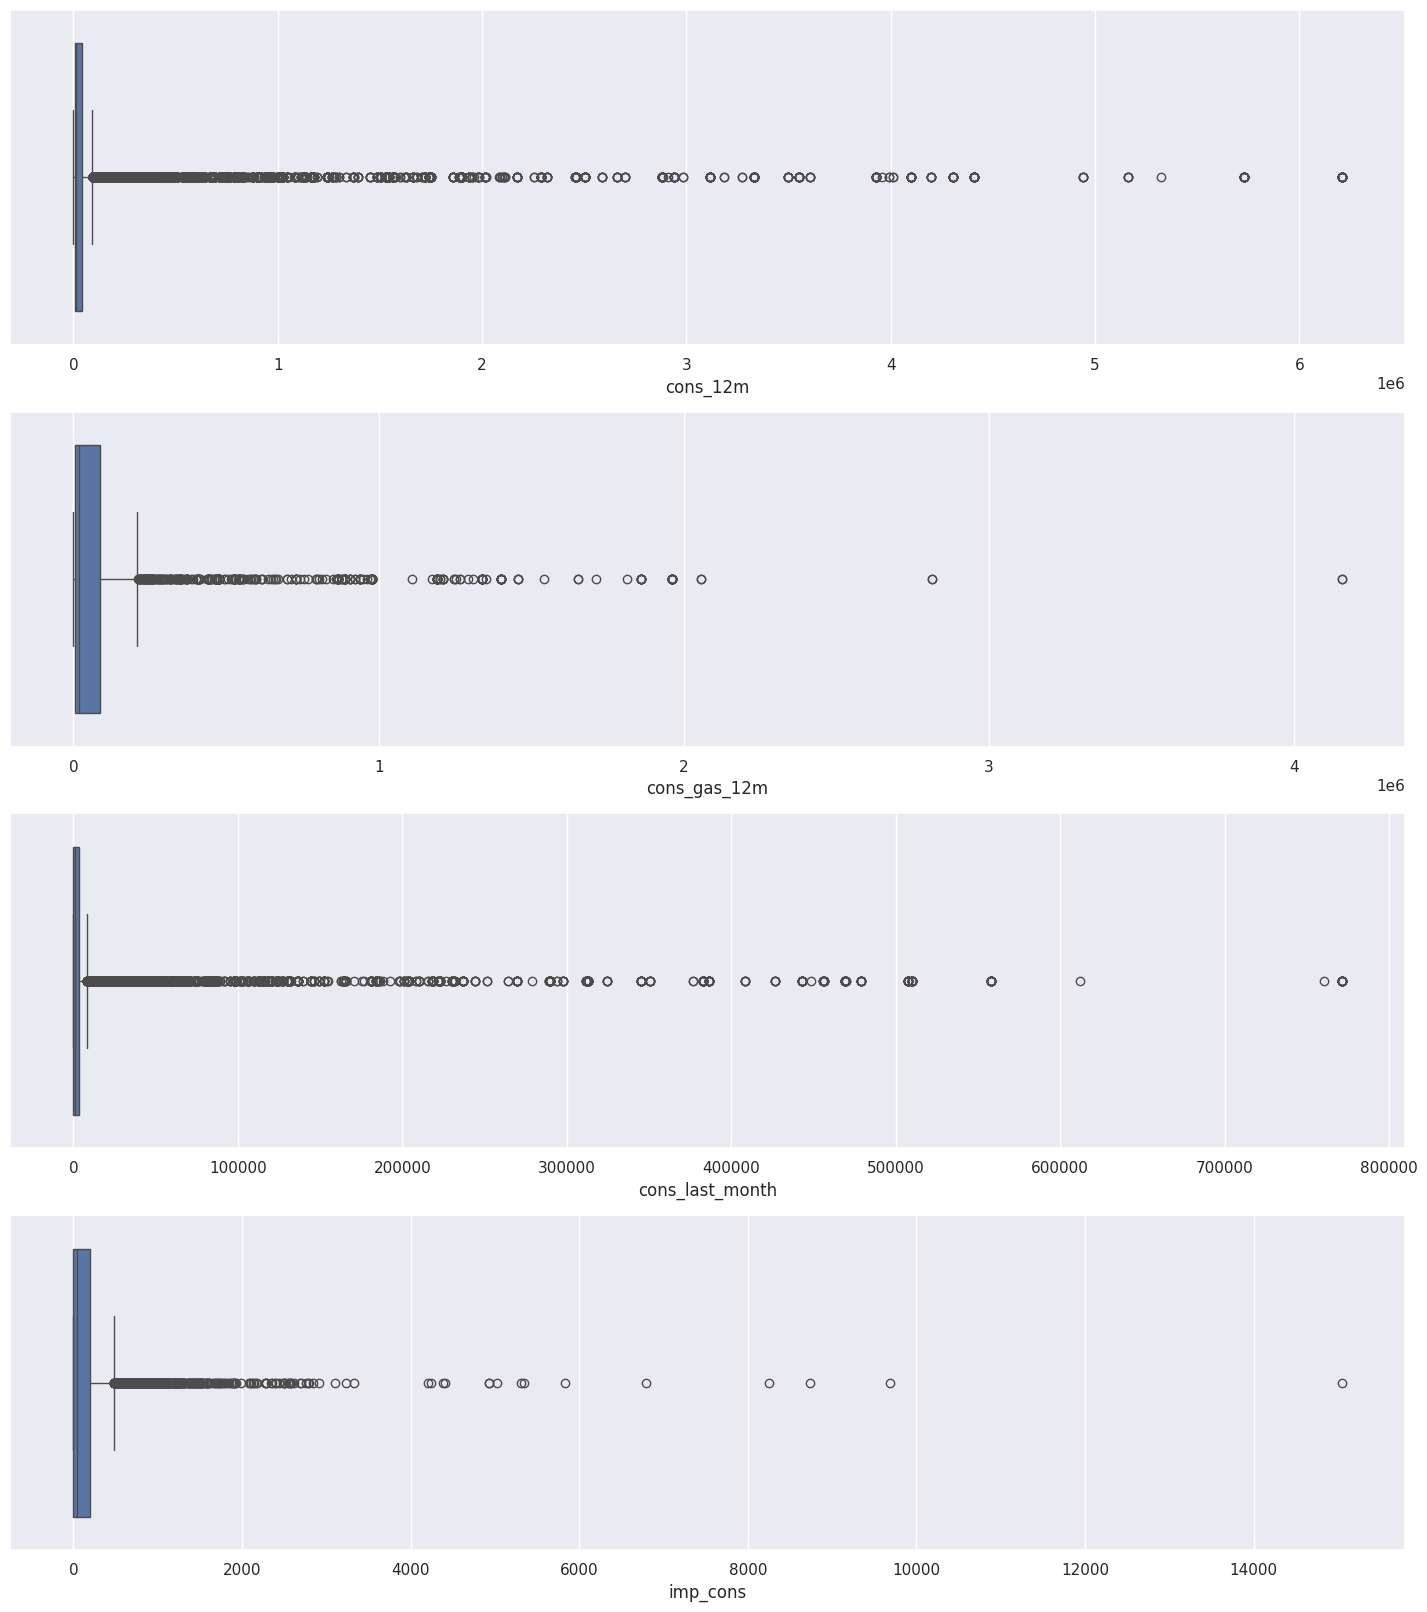

In [60]:
fig, axs = plt.subplots(nrows=4, figsize=(18,20))

sns.boxplot(consumption['cons_12m'], ax=axs[0], orient='h')
sns.boxplot(consumption[consumption['has_gas'] == 't']['cons_gas_12m'], ax=axs[1], orient='h')
sns.boxplot(consumption['cons_last_month'], ax=axs[2], orient='h')
sns.boxplot(consumption['imp_cons'], ax=axs[3], orient='h')

plt.show()

We see positive skewness and many outliers, we will deal with skewness and outliers during feature engineering

##Forecasted consumption

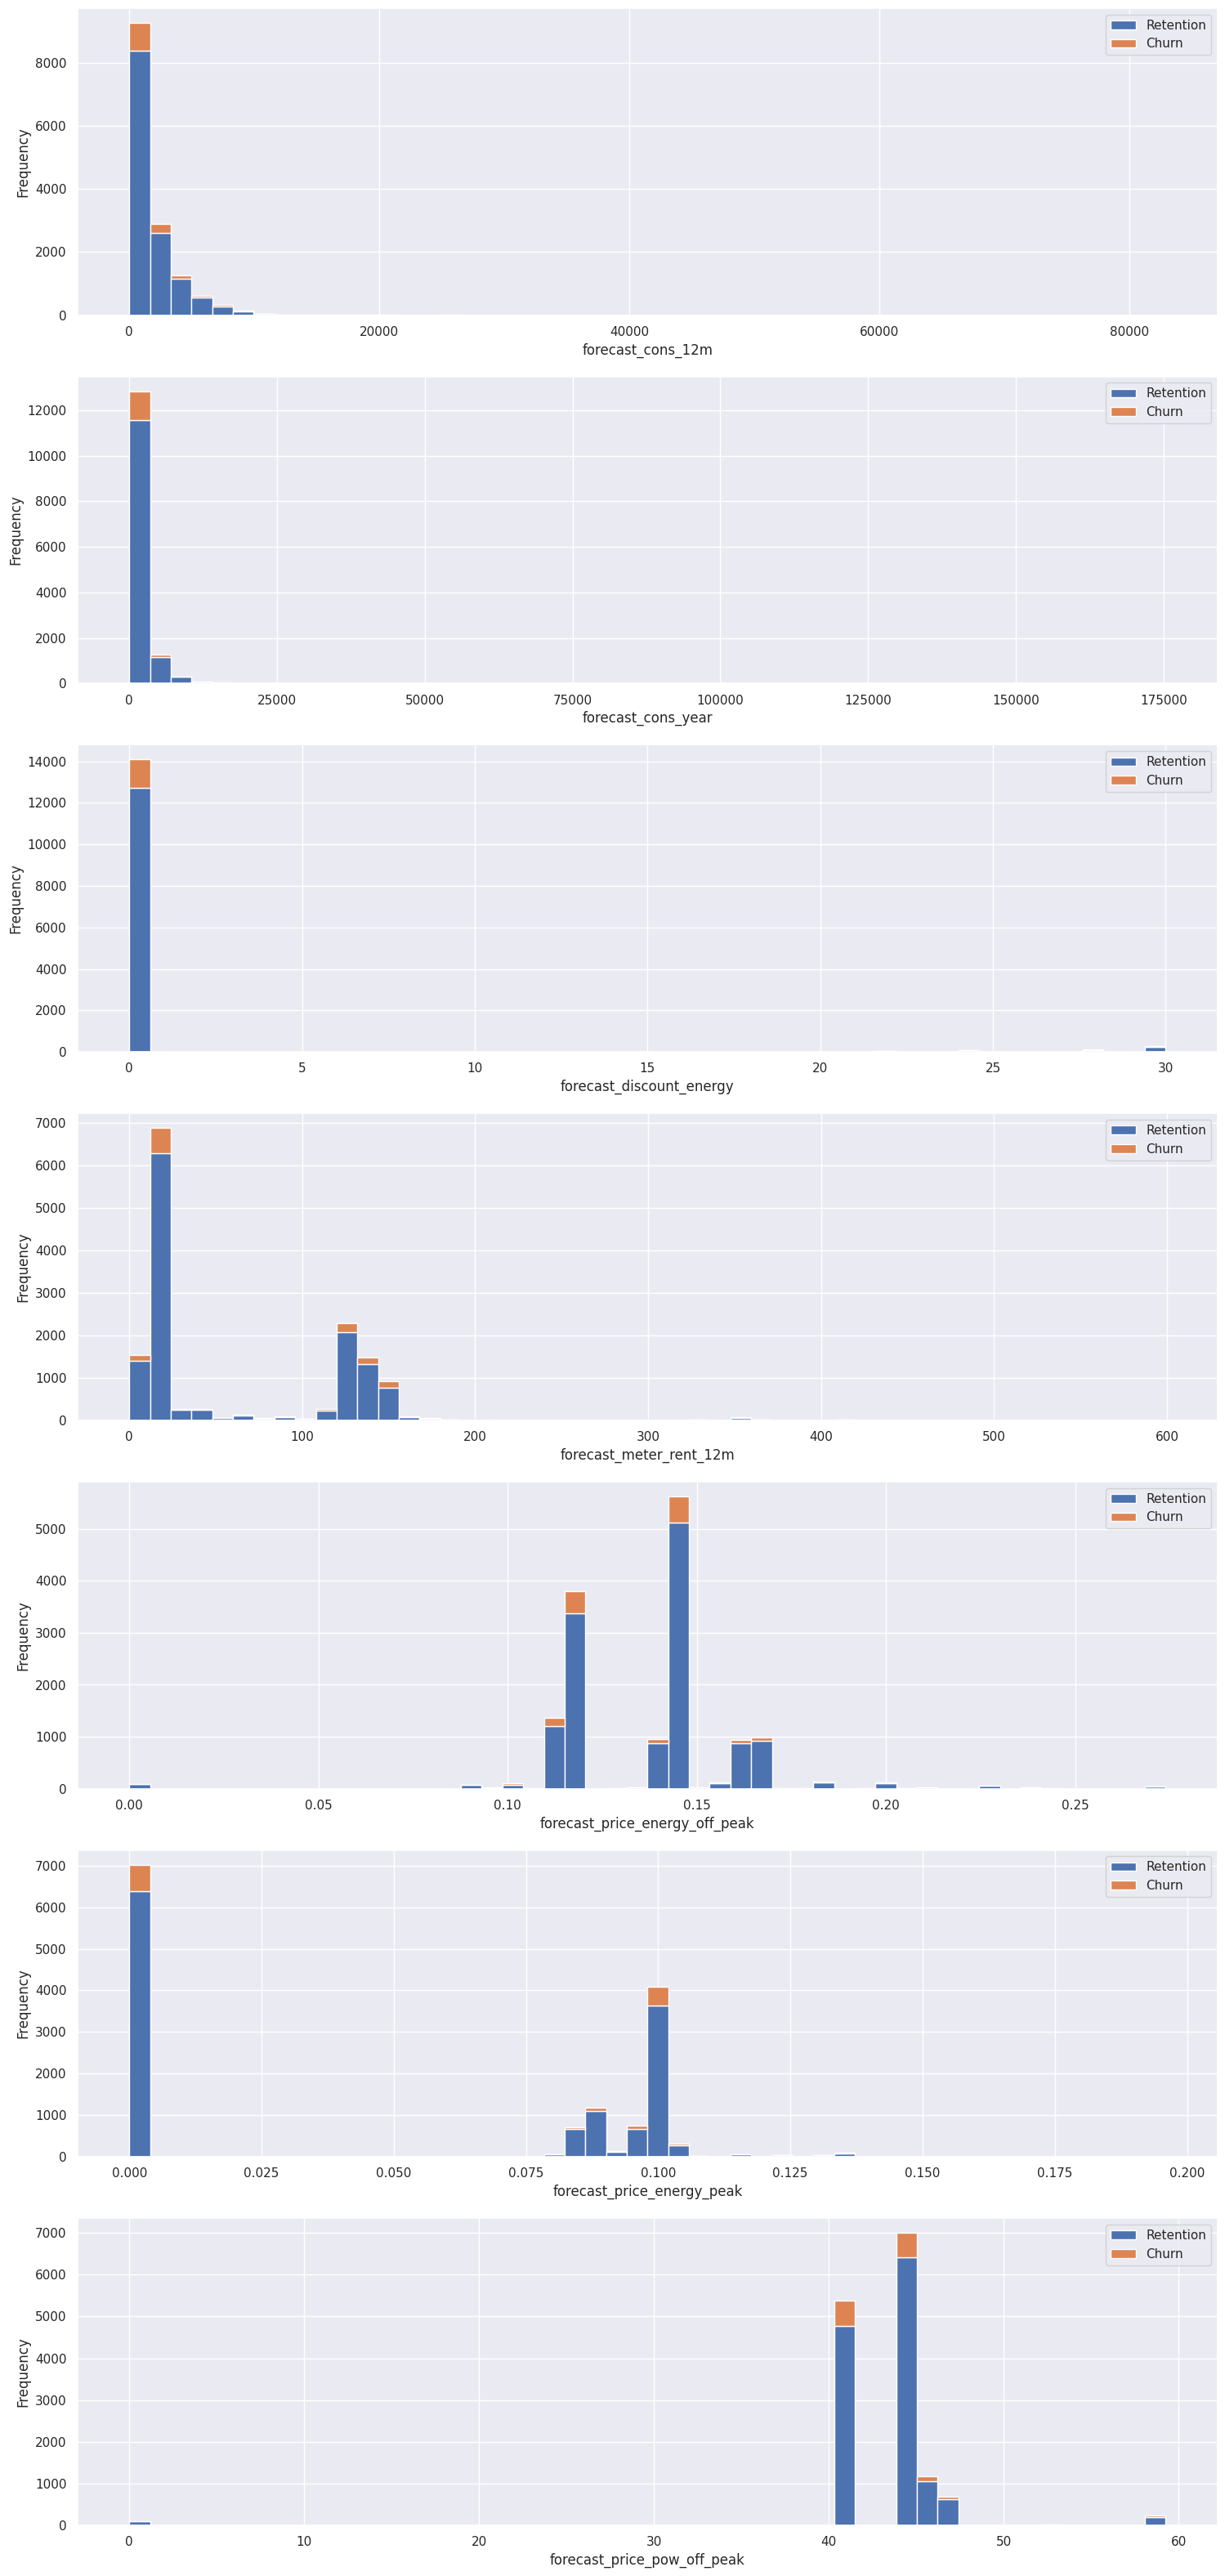

In [61]:
forecast = client_df[
    ['id', 'forecast_cons_12m', 'forecast_cons_year',
     'forecast_discount_energy', 'forecast_meter_rent_12m',
     'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
     'forecast_price_pow_off_peak', 'churn']
    ]

fig, axs = plt.subplots(nrows=7, figsize=(18,40))
plot_distribution(forecast, 'forecast_cons_12m', axs[0])
plot_distribution(forecast, 'forecast_cons_year', axs[1])
plot_distribution(forecast, 'forecast_discount_energy', axs[2])
plot_distribution(forecast, 'forecast_meter_rent_12m', axs[3])
plot_distribution(forecast, 'forecast_price_energy_off_peak', axs[4])
plot_distribution(forecast, 'forecast_price_energy_peak', axs[5])
plot_distribution(forecast, 'forecast_price_pow_off_peak', axs[6])


Similiar to consumption, we are observing positive skewness, creating a very long tail for the higher values.

##Contract type

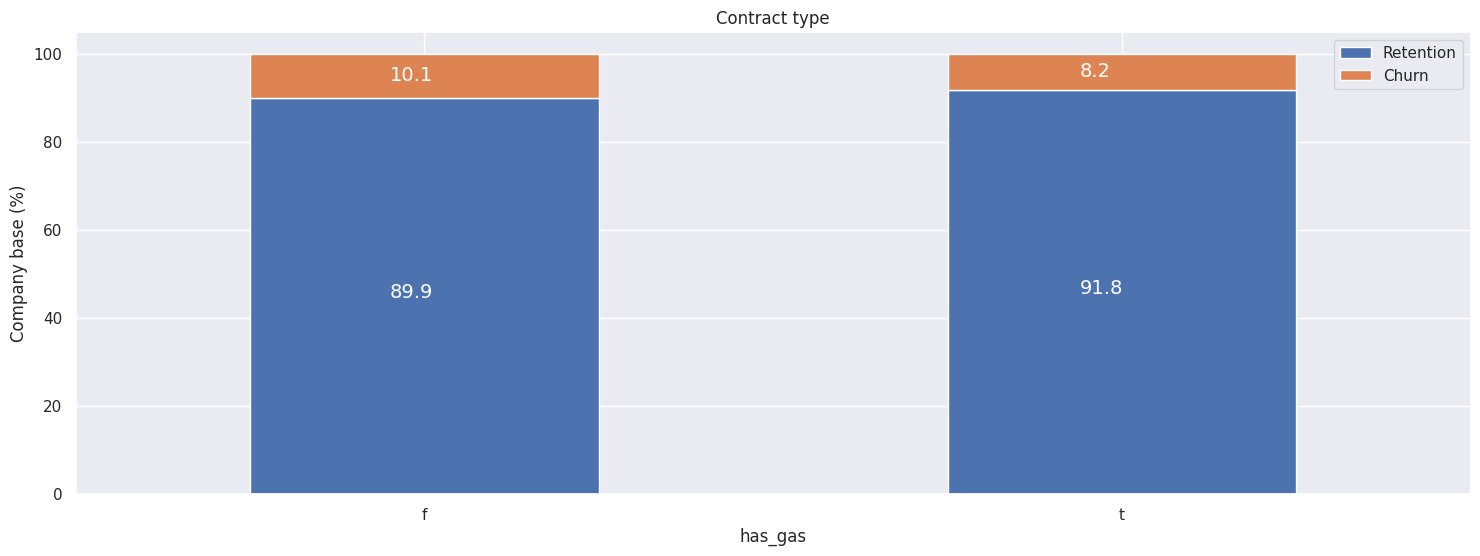

In [62]:
contract = client_df[['id', 'churn', 'has_gas']]
contract = contract.groupby(['has_gas', 'churn'])['id'].count().unstack(level=1).fillna(0)
contract_churn = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(contract_churn, 'Contract type')


The churn rates look similiar along the contract types

##Margins

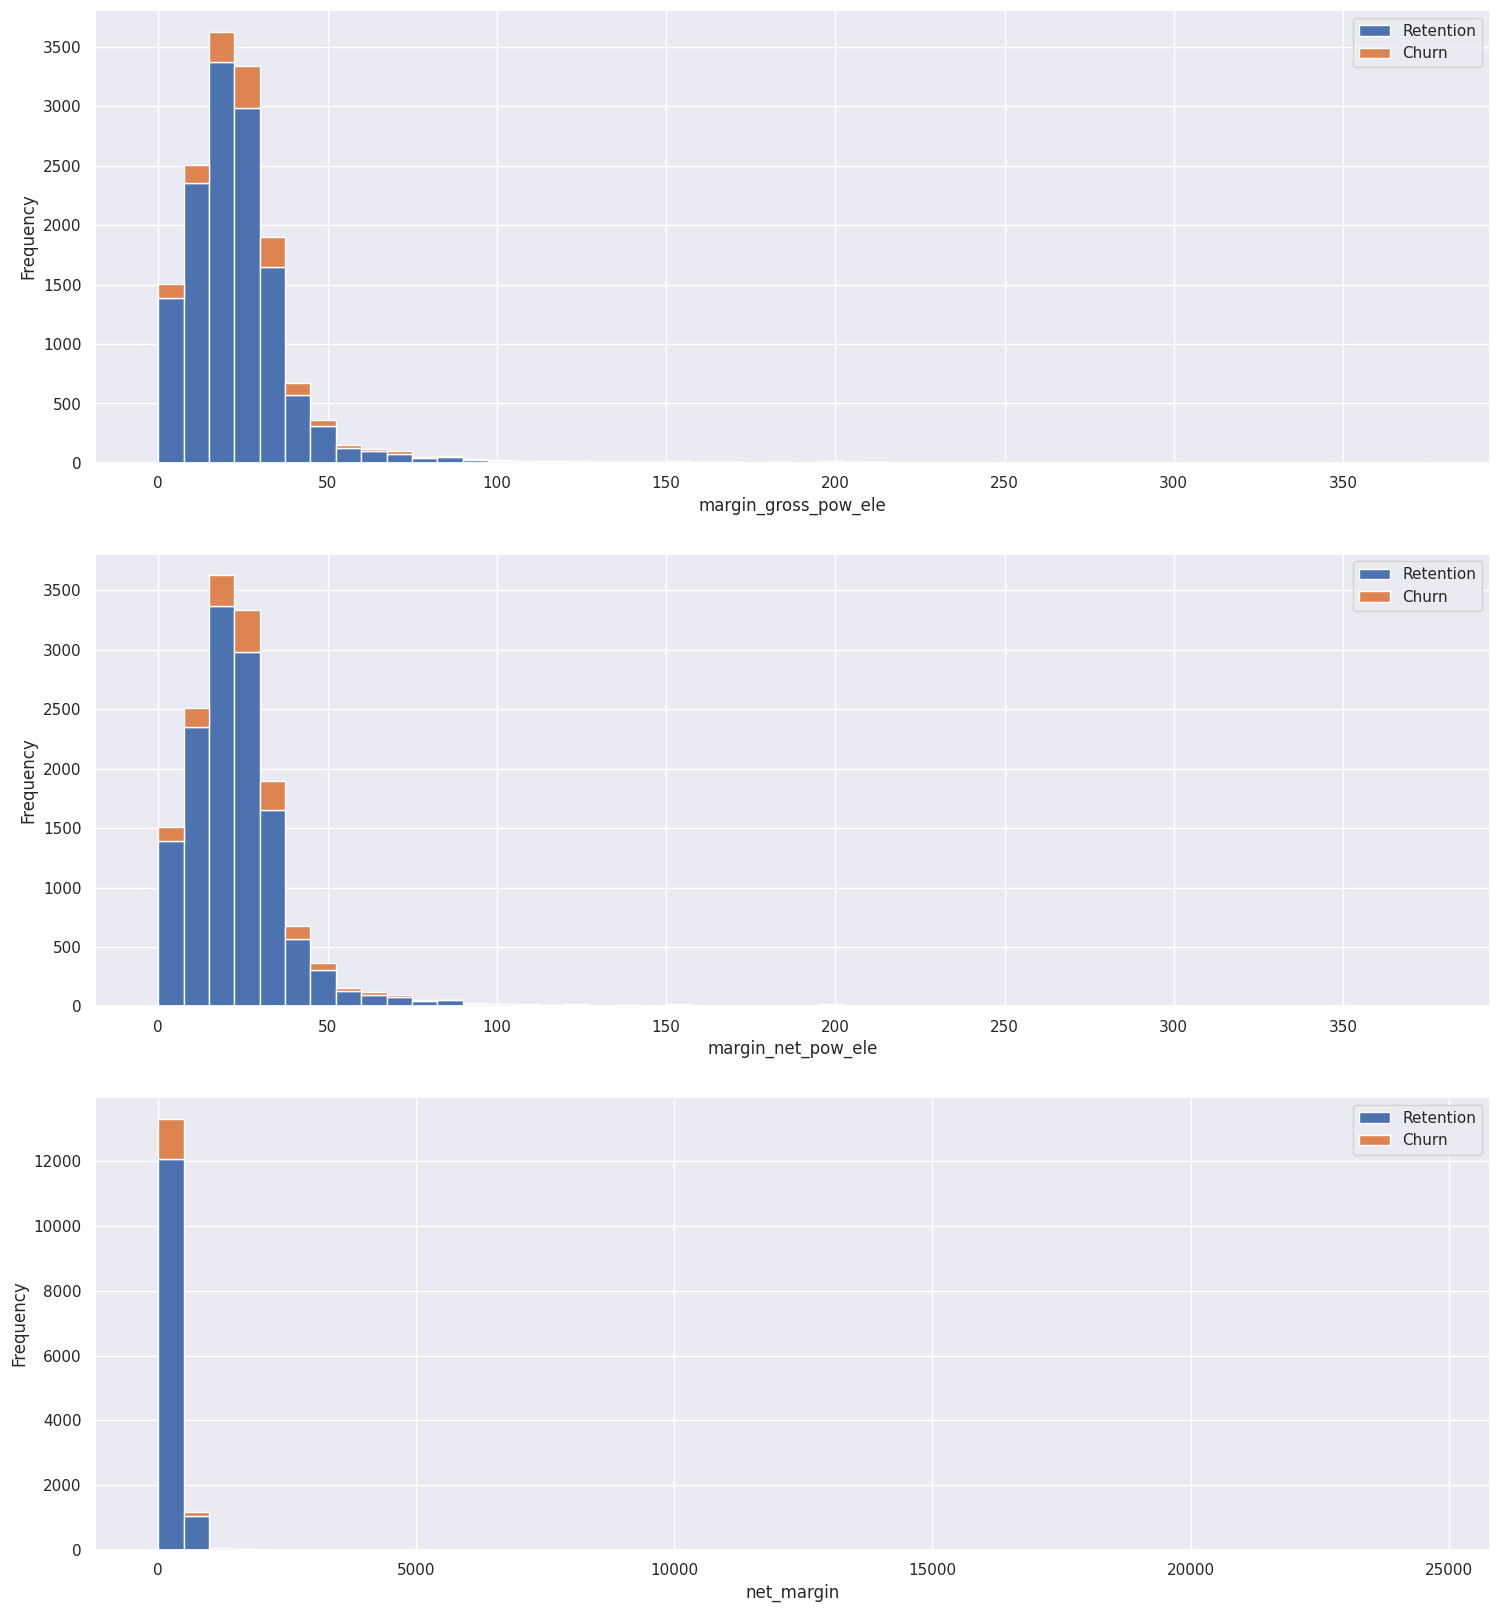

In [63]:
margins= client_df[['id', 'churn', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

fig, axs = plt.subplots(nrows=3, figsize=(18,20))
plot_distribution(margins, 'margin_gross_pow_ele', axs[0])
plot_distribution(margins, 'margin_net_pow_ele', axs[1])
plot_distribution(margins, 'net_margin', axs[2])


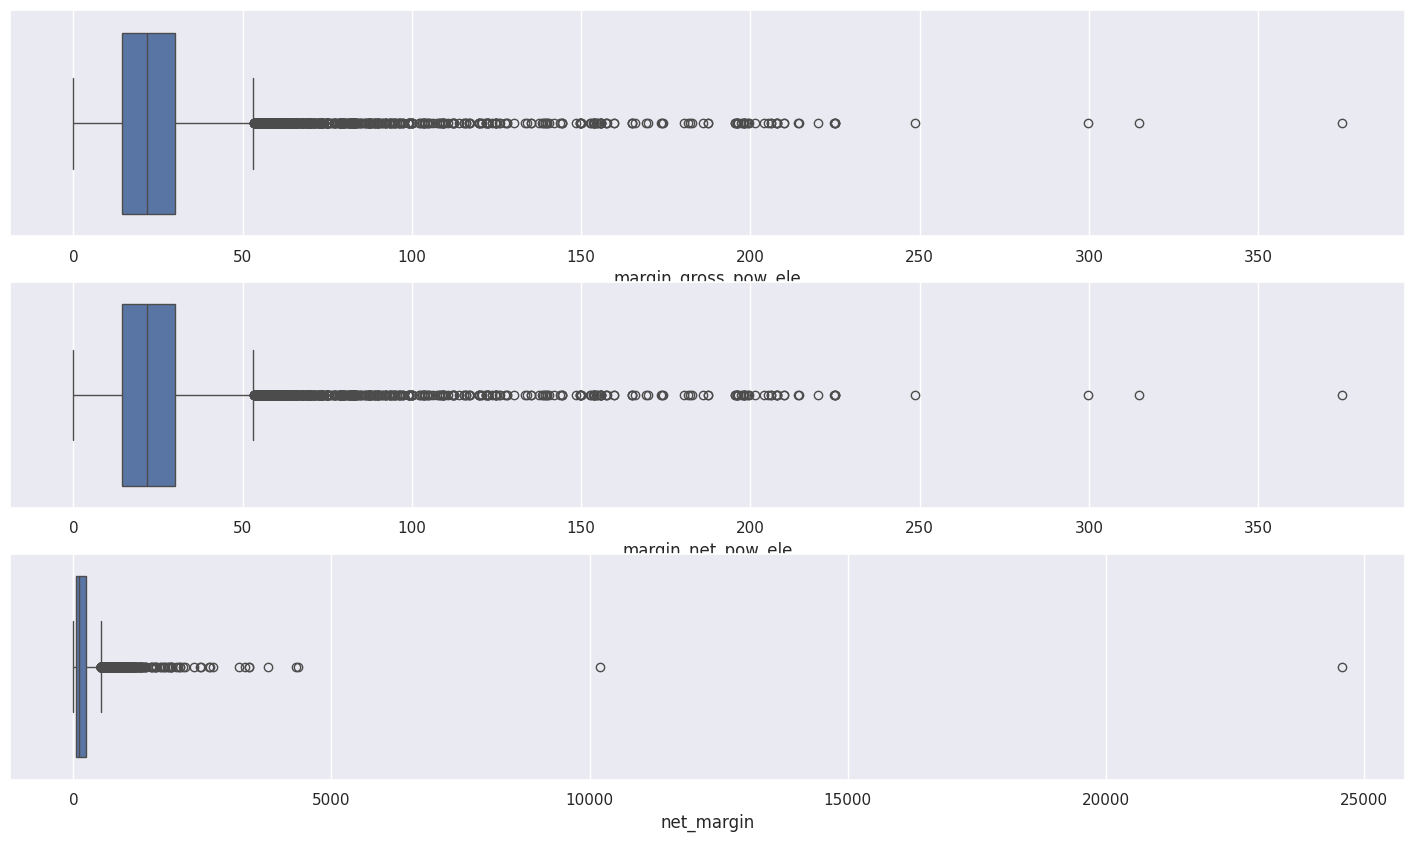

In [65]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 10))

sns.boxplot(margins['margin_gross_pow_ele'], ax=axs[0], orient='h')
sns.boxplot(margins['margin_net_pow_ele'], ax=axs[1], orient='h')
sns.boxplot(margins['net_margin'], ax=axs[2], orient='h')

plt.show()

We are observing outliers in the margin dataset that we will deal with during feature engineering

##Subscribed power

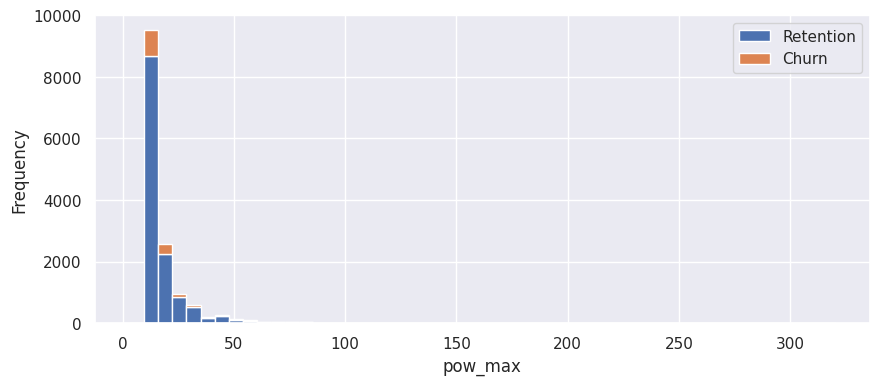

In [74]:
power = client_df[['id', 'churn', 'pow_max']]

fig, axs = plt.subplots(nrows=1, figsize=(10, 4))
plot_distribution(power, 'pow_max', axs)

## Customer Behavior

In [77]:
customer = client_df[['id', 'churn', 'nb_prod_act', 'num_years_antig', 'origin_up']]
customer.head(3)

,id,churn,nb_prod_act,num_years_antig,origin_up
0,24011ae4ebbe3035111d65fa7c15bc57,1,2,3,lxidpiddsbxsbosboudacockeimpuepw
1,d29c2c54acc38ff3c0614d0a653813dd,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws
2,764c75f661154dac3a6c254cd082ea7d,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws


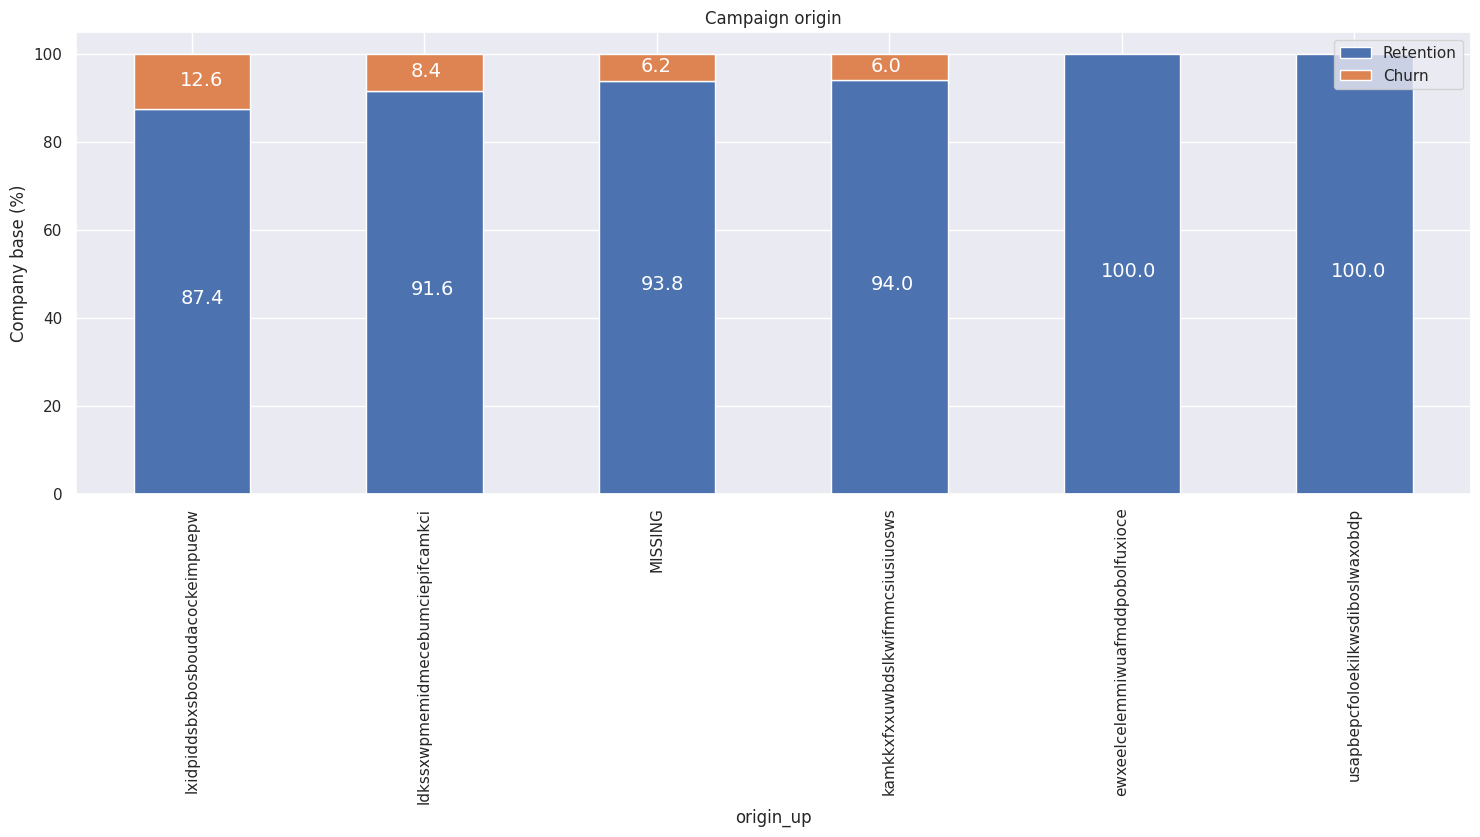

In [80]:
campaign = customer[['id', 'churn', 'origin_up']]
campaign = campaign.groupby(['origin_up', 'churn'])['id'].count().unstack(level=1).fillna(0)
campaign_churn = (campaign.div(campaign.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(campaign_churn, 'Campaign origin', rot_=90)


We see that the churn can be linked to 4 marketing campaigns that originally converted the customer, unknown campaign sources are labeled as missing

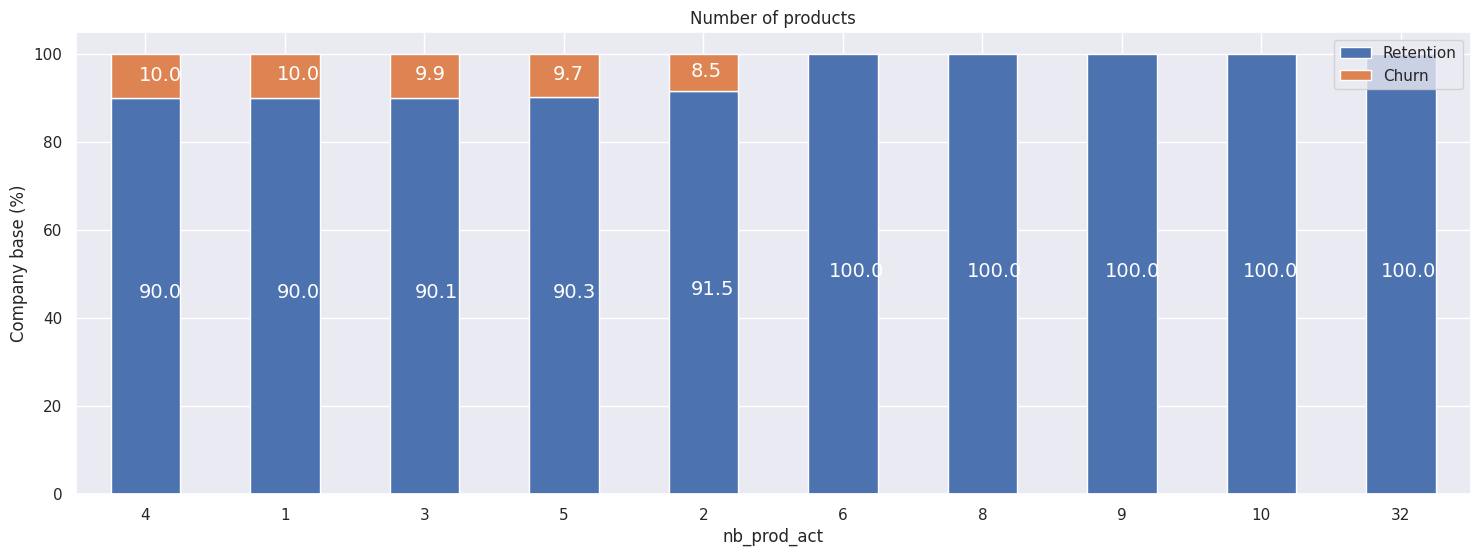

In [88]:
nb_products = customer[['id', 'churn', 'nb_prod_act']]
nb_products = nb_products.groupby(['nb_prod_act', 'churn'])['id'].count().unstack(level=1).fillna(0)
nb_products = (nb_products.div(nb_products.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(nb_products, 'Number of products')



It seems churned customers are related to accounts that had lower number of active products and services, less than 6

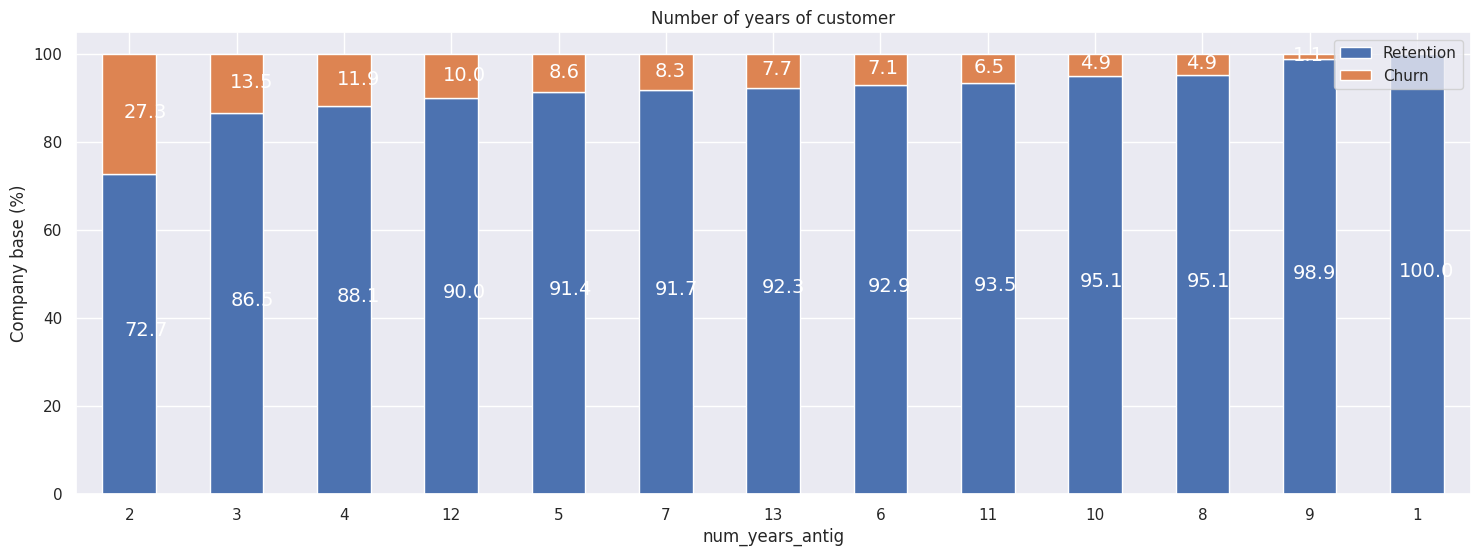

In [94]:
antig = customer[['id', 'churn', 'num_years_antig']]
antig = antig.groupby(['num_years_antig', 'churn'])['id'].count().unstack(level=1).fillna(0)
antig = (antig.div(antig.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(antig, 'Number of years of customer')




We see that the churn rate has nearly doubled for customers in their second contract year compared to customers in their third contract year. Nearly 28% of customers that closed their contract last year churned after their first year renewal term. For customers that have been a customer for the last 2 years, the churn rate is also higher than years before with 13.5%.